In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2 
import os
import random
import mpimg
from sklearn.svm import SVC
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
%matplotlib inline

1. Convert the image into binary image. From each class in the dataset use 70% for training and 30% for testing.
2. Extract features from these and store them in a csv file (features should be chosen by you - eg. binary pixel vectors, total number of white pixels, local binary patterns). Represent each image using such features. [2 marks]
3. Use the features for classification using SVM (default setting). Print classification report. [3 marks]
4. Apply grid search for hyper-parameter tuning.(eg: kernel, C, gamma). [3 marks]
5. Report the model with best accuracy. [2 marks]

In [2]:
dir = r'C:\Users\Dell\Machine Learning Foundations & Applications\March 25\Lab0609' 

In [3]:
categories = ['A','B','C','D','E','F','G','H','I','nothing']

(50, 50)


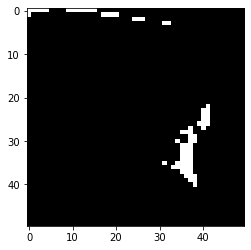

(50, 50)


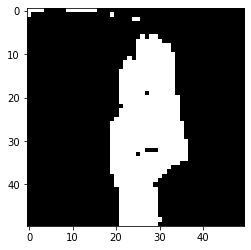

(50, 50)


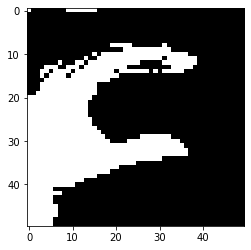

(50, 50)


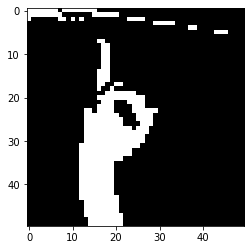

(50, 50)


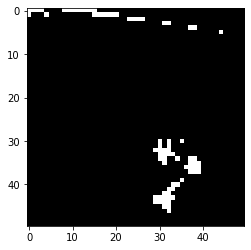

(50, 50)


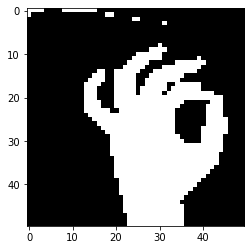

(50, 50)


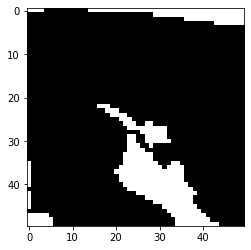

(50, 50)


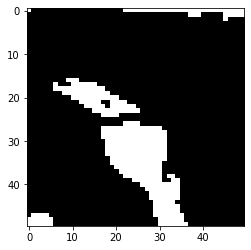

(50, 50)


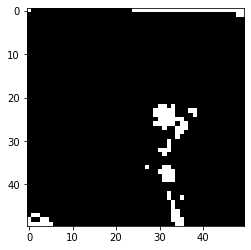

(50, 50)


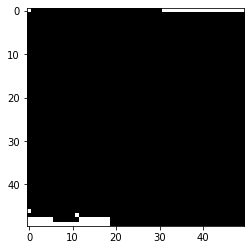

In [4]:
data = []
for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    for img in os.listdir(path):
#         imgpath = os.path.join(path,img)
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array,(50,50)) #reducing the size 
        img_array = cv2.threshold(img_array, 50, 50, cv2.THRESH_BINARY)
        #print(img_array)
        img_array_new = np.array(img_array[1]).flatten()
        data.append([img_array_new,label])
        #img_array_new = img_array[1].astype('float64')
#         img_array = np.asarray(img_array,dtype = 'float')
    #plt.imshow(img_array,cmap = 'gray')
    #plt.show()
    print(img_array[1].shape)
    #cv2.imshow('',img_array[1])
    #print(img_array[1].dtype)
    plt.imshow(img_array[1],cmap = 'Greys',interpolation = 'nearest')
    plt.show()
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

In [6]:
print(len(data))

30000


In [7]:
data[-5:]

[[array([ 0, 50, 50, ..., 50, 50, 50], dtype=uint8), 9],
 [array([ 0, 50, 50, ..., 50, 50, 50], dtype=uint8), 9],
 [array([ 0, 50, 50, ..., 50, 50, 50], dtype=uint8), 9],
 [array([ 0, 50, 50, ..., 50, 50, 50], dtype=uint8), 9],
 [array([ 0, 50, 50, ..., 50, 50, 50], dtype=uint8), 9]]

In [8]:
random.shuffle(data)

In [9]:
features = []
labels = []
for feature,label in data:
    #print(feature.shape)
    feature = feature.reshape((1,-1))
    #print(feature.shape)
    features.append(feature)
    labels.append(label)

In [10]:
print(features[0:5])
print(features[1].shape)
print('Total number of Examples:',len(features))

[array([[ 0, 50, 50, ..., 50, 50, 50]], dtype=uint8), array([[ 0,  0,  0, ..., 50, 50, 50]], dtype=uint8), array([[ 0, 50, 50, ..., 50, 50, 50]], dtype=uint8), array([[ 0,  0,  0, ..., 50, 50, 50]], dtype=uint8), array([[ 0,  0,  0, ..., 50, 50, 50]], dtype=uint8)]
(1, 2500)
Total number of Examples: 30000


In [11]:
print(labels[-5:])
#print(labels[1].shape)
print('Total number of Examples:',len(labels))

[1, 9, 0, 4, 8]
Total number of Examples: 30000


In [12]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC()
model = make_pipeline(pca, svc)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels,random_state=42,test_size = 0.3)

In [14]:
X_train = np.array(X_train).reshape(-1,2500)
X_test = np.array(X_test).reshape(-1,2500)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(21000, 2500)
(9000, 2500)
(9000,)
(21000,)


### Model with default settings

In [15]:
pca1 = PCA(n_components=150, whiten=True, random_state=42)
X_train1 = pca1.fit_transform(X_train)
X_test1 = pca1.transform(X_test)
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

In [16]:
classifier = SVC()
classifier.fit(X_train1,y_train)

SVC()

In [17]:
y_pred_1 = classifier.predict(X_test1)

In [18]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       915
           1       0.67      0.89      0.76       885
           2       0.90      0.80      0.85       879
           3       0.91      0.80      0.85       891
           4       0.85      0.92      0.88       929
           5       0.84      0.84      0.84       931
           6       0.96      0.91      0.93       874
           7       0.96      0.98      0.97       920
           8       0.95      0.91      0.93       901
           9       1.00      0.99      1.00       875

    accuracy                           0.88      9000
   macro avg       0.89      0.88      0.89      9000
weighted avg       0.89      0.88      0.89      9000



### Grid Search for tuning parameters

In [19]:
param_grid = {'svc__C': [1, 5],
              'svc__gamma': [0.001, 0.005],
             'svc__kernel':['rbf','linear']}
grid = GridSearchCV(model, param_grid,n_jobs = -1)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005, 'svc__kernel': 'rbf'}


In [20]:
model = grid.best_estimator_
y_pred_2 = model.predict(X_test)

In [21]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       915
           1       0.75      0.91      0.82       885
           2       0.90      0.83      0.87       879
           3       0.94      0.86      0.90       891
           4       0.89      0.96      0.92       929
           5       0.90      0.87      0.88       931
           6       0.97      0.94      0.95       874
           7       0.97      0.99      0.98       920
           8       0.96      0.94      0.95       901
           9       1.00      1.00      1.00       875

    accuracy                           0.92      9000
   macro avg       0.92      0.92      0.92      9000
weighted avg       0.92      0.92      0.92      9000



In [22]:
df = pd.DataFrame({'Features':features,'Labels':labels})
df.to_csv('MLFA_Assignment_Feature_CSV.csv')

In [25]:
print('The model with the best accuracy is:')
print(model)

The model with the best accuracy is:
Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=5, gamma=0.005))])


###### Best model is classifier with C = 5, gamma = 0.005, kernel = RBF. Accuracy = 92%